# 5 dimensions of human personality

### Purpose of the project
We want to investigate the way people can fake their responses into a questionnaire for obtaining a job or a specific role. In addition we want to model data making possible to detect liers and to remove the bias caused by the aim to appear  more suitable for the role.

### Data collection
In this experiment participants were required to respond to the same questionnaire twice. First, they were asked to respond honestly to all of its questions. Then, they were instructed them to fake their responses for a **role in a Humanitarian Organization**. We have the same subject responding in an honest condition and in one of instructed faking. Participants were asked to respond to the same set of 10 items twice, first honestly and then altering their answers to obtain a personal gain in the context described before. 

### Expectations
We expect the liers will give higher responses than truth-tellers because they have to appear in a better light and more suitable for the role.

In [1]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # or any {'0', '1', '2'}

# import libraries
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Init Plugin
Init Graph Optimizer
Init Kernel


In [2]:
# import and show dataframe
data = pd.read_csv('BF_df_CTU.csv')
n,p = data.shape # extract dimensions

print(f"We have {n//2} respondents that took questionnaire twice, in H (Honest) and D (Dishonest) condition")
data.head()

We have 221 respondents that took questionnaire twice, in H (Honest) and D (Dishonest) condition


,EX1G,EX2G,A1G,A2G,C1G,C2G,ES1G,ES2G,O1G,O2G,CONDITION
0,4,4,4,4,4,5,4,4,4,4,H
1,4,2,2,4,4,5,3,4,4,4,H
2,4,2,2,4,4,4,3,4,4,4,H
3,4,2,2,4,2,4,5,5,4,2,H
4,3,2,3,4,5,5,4,4,5,5,H


In [3]:
# divide data in H and D
x_real = data.iloc[:n//2,:-1]
x_fake = data.iloc[n//2:,:-1]

In [4]:
# randomly choose 80% train, 10% validation, 10% test set
np.random.seed(0) # make reults reproducible
index = np.random.choice([0,1,2], size=n//2, p=[0.8,0.1,0.1]) # sample random groups of indexes

x_real_smalltrain = x_real[index==0]
x_real_val = x_real[index==1]
x_real_test = x_real[index==2]

x_fake_smalltrain = x_fake[index==0]
x_fake_val = x_fake[index==1]
x_fake_test = x_fake[index==2]

# create a full train set (that contains validation data) for final model training before test part
x_real_train = x_real[index!=2]
x_fake_train = x_fake[index!=2]

## Exploratory analysis
In which way people are faking?
Let's plot some example of the true vs the fake responses of the same subject!

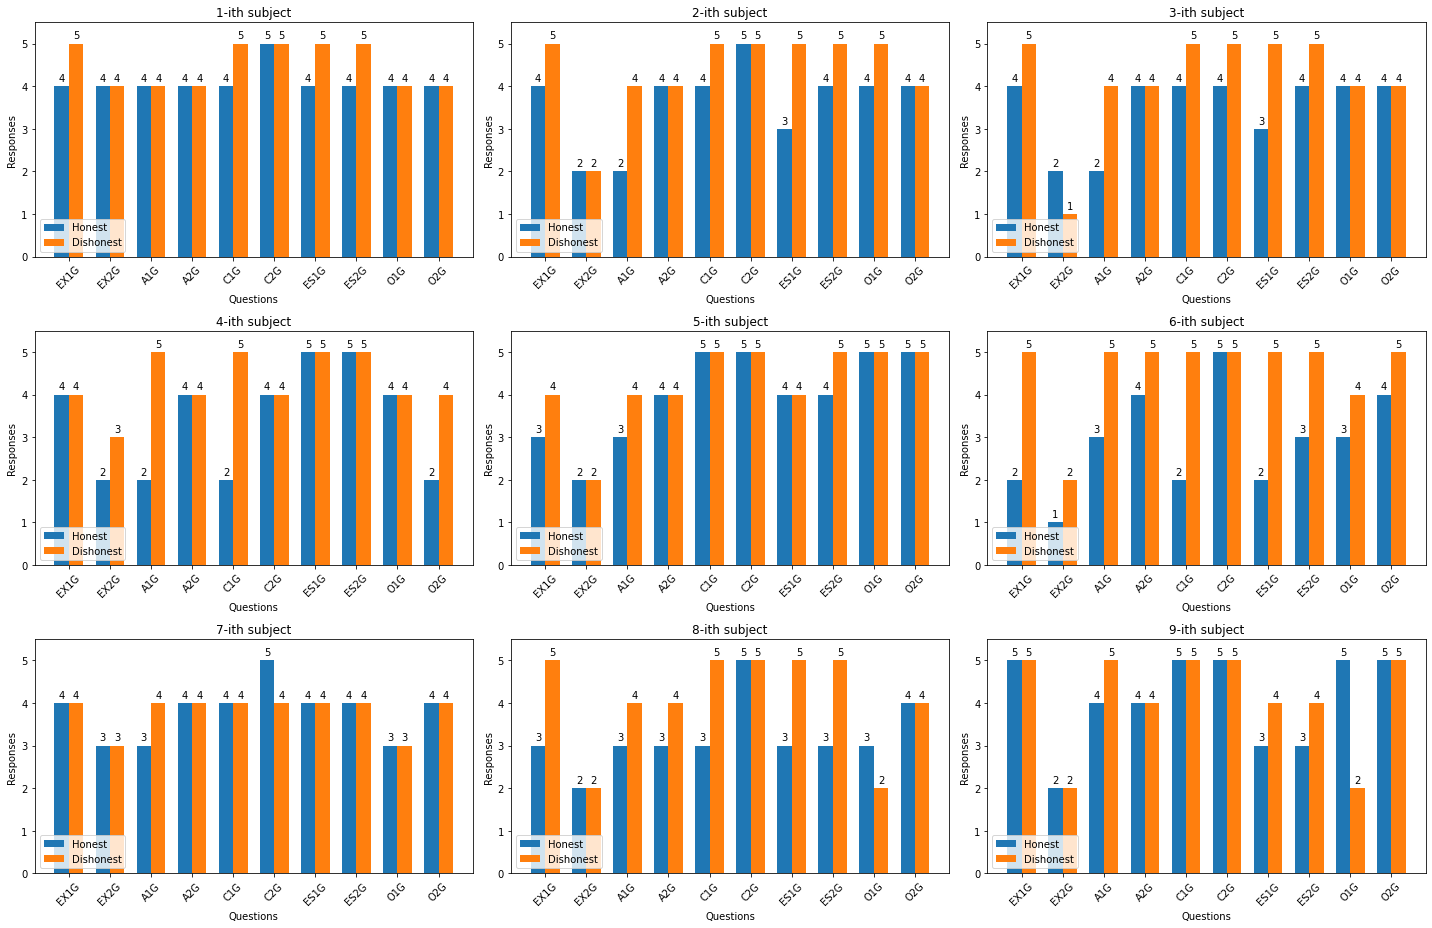

In [5]:
fig, ax = plt.subplots(3,3, figsize=(20, 13))

for i in range(9):

    row = int(i/3)
    col = i % 3

    labels = list(data.columns[:-1])

    honest = list(data.iloc[i,:-1])
    lier = list(data.iloc[n//2 + i,:-1])

    x = np.arange(len(labels))  
    width = 0.35  

    rects1 = ax[row, col].bar(x - width/2, honest, width, label='Honest')
    rects2 = ax[row, col].bar(x + width/2, lier, width, label='Dishonest')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[row, col].set_title(str(i+1) + "-ith subject")
    ax[row, col].set_ylabel('Responses')
    ax[row, col].set_xlabel('Questions')
    ax[row, col].set_xticks(x)
    ax[row, col].set_xticklabels(labels, rotation=45)
    ax[row, col].legend(bbox_to_anchor=(0,0), loc="lower left")
    ax[row, col].set_ylim([0,5.5])

    def autolabel(rects):
        """Attach a text label above each bar, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax[row, col].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

fig.tight_layout()

plt.show()

What the different questions mean? (For this reason we decided to call this project *"5 dimensions of Human Personality"*)
- EX = Extroversion scale
- A = Agreeableness scale
- C = Consciousness scale
- ES = Emotional stability scale 
- O = Openness scale

Now let's see the mean of the differences among all subjects!

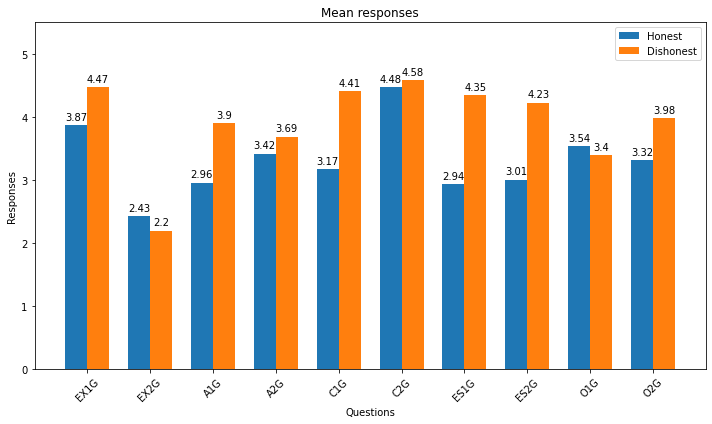

In [6]:
fig, ax = plt.subplots(1,1, figsize=(10, 6))

labels = list(data.columns[:-1])

honest = list(x_real.mean(0).round(2))
lier = list(x_fake.mean(0).round(2))

x = np.arange(len(labels))  
width = 0.35  

rects1 = ax.bar(x - width/2, honest, width, label='Honest')
rects2 = ax.bar(x + width/2, lier, width, label='Dishonest')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_title("Mean responses")
ax.set_ylabel('Responses')
ax.set_xlabel('Questions')
ax.set_xticks(x)
ax.set_xticklabels(labels, rotation=45)
ax.legend(bbox_to_anchor=(1,1), loc="upper right")
ax.set_ylim([0,5.5])

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom')


autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()

Looking deeper into questions we can make some hypotesis on the way how people are faking responses

I see myself as someone who ...
- EX
    - is outgoing, sociable (extroversion);
    - is reserved (extroversion reversed);
- A
    - tends to find fault with others (agreeableness, reversed);    
    - is generally trusting (agreeableness);
- C
    - tends to be lazy (consciousness, reversed)
    - does a thorough job (consciousness)
- ES
    - gets nervous easily (emotional stability, reversed);
    - is relaxed, handles stress well (emotional stability);
- O
    - has an active imagination (openness);
    - has few artistic interests (openness, reversed).

## Classification of fake questionnaires
In this modelling part of the project we try to find faked questionnaires looking at responses, we'll use an interpretable model such as a **sparse** version of **regularized logistic regression**. In this way we can get insights about what are the responses that more discriminates between Honest and Dishonest. 

In [7]:
# create target and explanatory variables
y = np.array([1 if c == "D" else 0 for c in data["CONDITION"]]) # create response array
X = data.iloc[:,:-1].copy() # make a copy of dataset removing last column

In [8]:
# split train and test data for good evaluation of the model, test size 10% of total 442 samples
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

In [9]:
# fit logistic regression with est regularization parameters on train set
from sklearn.linear_model import LogisticRegression

LR = LogisticRegression(random_state=124, verbose=False, penalty="l1", solver="saga", max_iter=3000, C = 0.1)
_ = LR.fit(X_train, y_train)

In [10]:
# make predictions and calculate accuracy score of classification
from sklearn.metrics import accuracy_score

y_hat = LR.predict(X_test)
print(f"Accuracy of regularized logistic regression: {accuracy_score(y_hat, y_test).round(2)}" ) 
print(f"There were {sum(y_hat != y_test)} errors on {len(y_test)} predictions")


Accuracy of regularized logistic regression: 0.91
There were 4 errors on 45 predictions


### Results exploration
The high accuracy ensures that the model behaviour is good for our pourpuses, but it's not the only thing we care about. In fact we need to inspect what are the most faked responses in order to appear on a better light fot the **role in Humanitarian Organization**.

The **following plot** helps us to understand what are the most faked questions and how the model coefficients are significative.


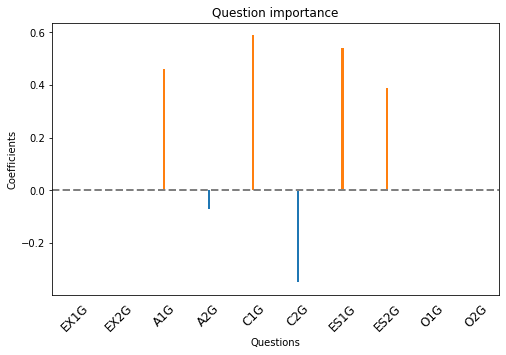

In [11]:
fig, ax = plt.subplots(figsize=(8, 5))

coef_df = pd.DataFrame({"varname" : list(data.columns)[:-1],
                        "coef" : LR.coef_.round(2)[0]})

coef_df.plot(x='varname', y='coef', kind='bar', 
             ax=ax, color='none', legend=False)
ax.set_xlabel('Questions')
ax.set_ylabel('Coefficients')
ax.set_title("Question importance")
ax.axhline(y=0, linestyle='--', color='gray', linewidth=2)

ax.bar(x=np.arange(coef_df.shape[0]), width=0.05,
           height=coef_df['coef'], color=["tab:blue" if c < 0 else "tab:green" if c == 0 else "tab:orange" for c in coef_df['coef']])

ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(list(data.columns)[:-1], 
                       rotation=45, fontsize=12)



As we can see the model does not watch EX (Extrovertion) and O (Opensess) for discriminating between honests and liers. 

C and ES seem to be the questions where the liers tend to fake more. A is also faked, in particular the "*tends to find fault with others*" question.

### What are the wrong predictions?
We can plot them for a better focus on why the model classificated these questionnaires wrong. 

In [12]:
# print misclassified examples

print("Misclassifications:")
errors = X_test.join(data["CONDITION"]).join(pd.Series(["D" if c == "H" else "H" for c in data["CONDITION"]], name="Prediction")).iloc[y_hat != y_test,:]
errors

Misclassifications:


,EX1G,EX2G,A1G,A2G,C1G,C2G,ES1G,ES2G,O1G,O2G,CONDITION,Prediction
116,5,2,2,4,5,5,5,4,3,2,H,D
79,5,2,4,3,5,4,3,3,2,3,H,D
75,4,1,5,3,2,5,5,4,5,3,H,D
199,5,1,4,5,5,5,5,5,5,5,H,D


### Comparison between misclassifications and typical behavior

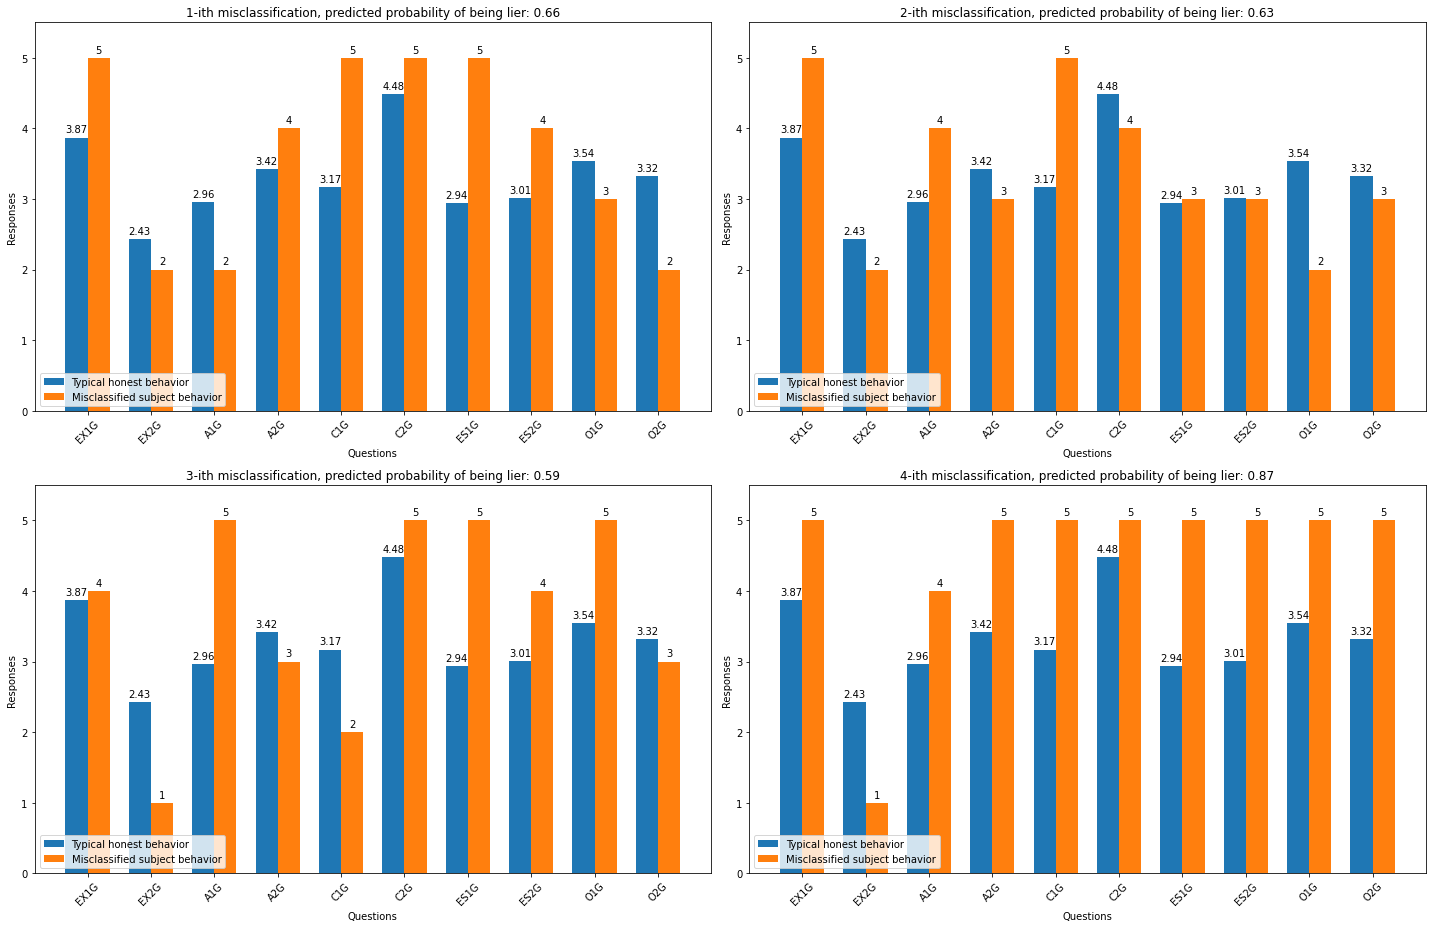

In [13]:
fig, ax = plt.subplots(2, 2, figsize=(20, 13))

for i in range(4):

    row = int(i/2)
    col = i % 2

    labels = list(data.columns[:-1])

    honest = list(x_real.mean(0).round(2))
    errs = list(errors.iloc[i, :-2])

    x = np.arange(len(labels))  
    width = 0.35  

    rects1 = ax[row, col].bar(x - width/2, honest, width, label='Typical honest behavior')
    rects2 = ax[row, col].bar(x + width/2, errs, width, label='Misclassified subject behavior')

    # Add some text for labels, title and custom x-axis tick labels, etc.
    ax[row, col].set_title(str(i+1) + "-ith misclassification, predicted probability of being lier: " + 
                           str(LR.predict_proba(np.array(errs).reshape((1,-1))).round(2)[0,1])  )
    ax[row, col].set_ylabel('Responses')
    ax[row, col].set_xlabel('Questions')
    ax[row, col].set_xticks(x)
    ax[row, col].set_xticklabels(labels, rotation=45)
    ax[row, col].legend(bbox_to_anchor=(0,0), loc="lower left")
    ax[row, col].set_ylim([0,5.5])

    def autolabel(rects):
        """Attach a text label above each bar in *rects*, displaying its height."""
        for rect in rects:
            height = rect.get_height()
            ax[row, col].annotate('{}'.format(height),
                        xy=(rect.get_x() + rect.get_width() / 2, height),
                        xytext=(0, 3),  # 3 points vertical offset
                        textcoords="offset points",
                        ha='center', va='bottom')


    autolabel(rects1)
    autolabel(rects2)

fig.tight_layout()

plt.show()

The model is correcly spotting the liers, but in few examples it classifies honest people, with non-typical behavior, as liers.

We notice that all misclassified examples are Honest questionnaires that were classified Dishonest. Maybe because of the fact that people responding to the questionnaire in first time didn't know that, in a second time, they were forced to fake good the questionnaire and thay already gave extremely high responses.

## Adjust faked questionnaires to honest

We will compare different approaches for infering the honest responses given a faked questionnaire:
- Naive approach (baseline)
- Denoising autoencoder
- Tree Based Regression
- ElasticNet Regression
- Neural Networks

## Regression approach

### Naive approach (regression)

All the proposed method should outperform the trivial strategy of subtracting to each subject faked response the average of the difference, across all subjects, among faked and honest response.

In [14]:
# calculate the mean of the differences between faked and real response
mean_train = (x_fake_train.to_numpy() - x_real_train.to_numpy()).mean(axis=0)

# predict the real Test Set response subtractin the mean from the fake responses
x_real_test_predicted = x_fake_test.to_numpy() - mean_train

# calculate the MSE on Test Set
test_mse_naive_reg = ((x_real_test_predicted - x_real_test.to_numpy()) **2).mean()
test_mae_naive_reg = (abs(x_real_test_predicted - x_real_test.to_numpy())).mean()
print(f"Naive approach: \n MSE metric: {test_mse_naive_reg.round(3)} \n MAE metric: {test_mae_naive_reg.round(3)}")

Naive approach: 
 MSE metric: 1.286 
 MAE metric: 0.845


With this **basic approach**, that we'll usa as a baseline, we have a Mean Absolute Error of 0.84. 
This means that we are able to predict Honest responses with a mean error of 0.84 points for each response. 

### Denoising autoencoder

In [15]:
dim_1 = 10
dim_2 = 7
dim_3 = 4

# the imput shape vector is composed by the 10 questions
input_vector = tf.keras.layers.Input(shape=(10,))

# define the encoder
hidden_1 = tf.keras.layers.Dense(dim_1, activation='sigmoid')(input_vector)
hidden_2 = tf.keras.layers.Dense(dim_2, activation='sigmoid')(hidden_1)
encoded = tf.keras.layers.Dense(dim_3, activation='sigmoid')(hidden_2)

# ...and the decoder...
hidden_3 = tf.keras.layers.Dense(dim_2, activation='sigmoid')(encoded)
decoded = tf.keras.layers.Dense(dim_1, activation='linear')(hidden_3)

# and finally the autoencoder
autoencoder = tf.keras.models.Model(inputs=input_vector, outputs=decoded)
opt = tf.keras.optimizers.Adam(learning_rate=0.001)
autoencoder.compile(optimizer=opt, loss='mse')

Metal device set to: Apple M1 Pro

systemMemory: 16.00 GB
maxCacheSize: 5.33 GB



In [16]:
# show autoencoder structure
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 10)]              0         
_________________________________________________________________
dense (Dense)                (None, 10)                110       
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 77        
_________________________________________________________________
dense_2 (Dense)              (None, 4)                 32        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 35        
_________________________________________________________________
dense_4 (Dense)              (None, 10)                80        
Total params: 334
Trainable params: 334
Non-trainable params: 0
_______________________________________________________________

In [17]:
# fit the denoising autoencoder
history = autoencoder.fit(x_fake_smalltrain, x_real_smalltrain, epochs=150, shuffle=True, validation_data=(x_fake_val, x_real_val),  verbose = False)

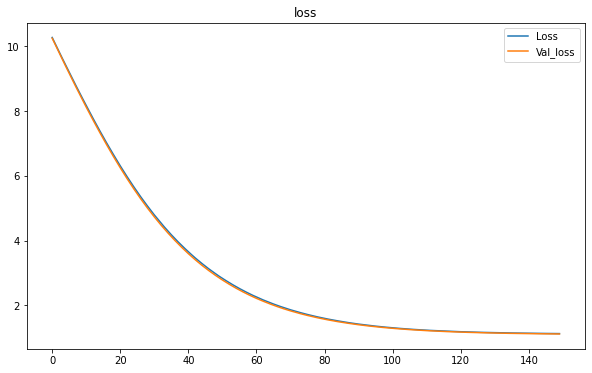

In [18]:
# plot loss and metrics 
def plot_loss(history):
  plt.figure(figsize=(10,6))
  plt.plot(history.epoch,history.history['loss'])
  plt.plot(history.epoch,history.history['val_loss'])
  plt.legend(["Loss", "Val_loss"])
  plt.title('loss')
  
plot_loss(history)

In [19]:
# fit on entire train
_ = autoencoder.fit(x_fake_train, x_real_train, epochs=150,  verbose = False)

# make predictions
x_real_test_predicted = autoencoder.predict(x_fake_test)

In [20]:

# calculate the MSE and MAE on Test Set
test_mse_denoising_autoencoder = ((x_real_test_predicted - x_real_test.to_numpy()) **2).mean()
test_mae_denoising_autoencoder = (abs(x_real_test_predicted - x_real_test.to_numpy())).mean()
print(f"Denoising Autoencoder approach: \n MSE metric: {test_mse_denoising_autoencoder.round(3)} \n MAE metric: {test_mae_denoising_autoencoder.round(3)}")

Denoising Autoencoder approach: 
 MSE metric: 1.045 
 MAE metric: 0.834


With **Denoising Autoencoder** approach we lightly improve the baseline, from a MSE of 1.286 to 1.046
### Tree based regression

In [21]:
from sklearn.model_selection import cross_val_score, GridSearchCV, KFold, RandomizedSearchCV
from scipy.stats import uniform, randint
import xgboost as xgb

def report_best_scores(results, n_top=3):
    for i in range(1, n_top + 1):
        candidates = np.flatnonzero(results['rank_test_score'] == i)
        for candidate in candidates:
            if i == 1:
                return results['params'][candidate]
                
# select params to combine for finding optimal configuration
params = {
    "colsample_bytree": uniform(0.7, 0.3),
    "gamma": uniform(0, 0.5),
    "learning_rate": uniform(0.03, 0.3), # default 0.1 
    "max_depth": randint(2, 6), # default 3
    "n_estimators": randint(100, 150), # default 100
    "subsample": uniform(0.6, 0.4)
}

In [22]:
X_train = x_fake_train

X_test = x_fake_test
y_test = x_real_test
y_pred = pd.DataFrame(index=y_test.index)

# we need to fit one model for each q (question)
for q in range(p-1):

    print(f"Start with question {q+1}")

    # define the target question
    y_train = x_real_train.iloc[:,q]

    # define the model, random state for reproducibility
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42)

    # search for best configuration with cross validation
    search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=10, cv=3, verbose=0, n_jobs=1, return_train_score=True)
    search.fit(X_train, y_train)

    # best model found
    best_model_parameters = report_best_scores(search.cv_results_, 1)

    # fit best configuration model
    xgb_model = xgb.XGBRegressor(objective="reg:squarederror", random_state=42, **best_model_parameters)
    xgb_model.fit(X_train, y_train)

    # predict and append the question
    y_column_pred = xgb_model.predict(X_test)
    y_pred = y_pred.join(pd.Series(y_column_pred, index=y_test.index, name=y_test.columns[q]))

Start with question 1
Start with question 2
Start with question 3
Start with question 4
Start with question 5
Start with question 6
Start with question 7
Start with question 8
Start with question 9
Start with question 10


In [23]:
# calculate the MSE and MAE on Test Set
test_mse_xgboost_reg = ((y_pred.to_numpy()- y_test.to_numpy()) **2).mean()
test_mae_xgboost_reg = (abs(y_pred.to_numpy()- y_test.to_numpy())).mean()
print(f"XGBoost regression approach: \n MSE metric: {test_mse_xgboost_reg.round(3)} \n MAE metric: {test_mae_xgboost_reg.round(3)}")

XGBoost regression approach: 
 MSE metric: 1.053 
 MAE metric: 0.817


With **Tree XGBRegressor** approach we lightly improve the Denoising Autoencoder approach

### ElasticNet Regression

In [24]:
from sklearn.linear_model import ElasticNet
from sklearn.model_selection import GridSearchCV
import warnings 
warnings.filterwarnings('ignore')

# grid search to tune the parameters:
parametersGrid = {"max_iter": [1,10,100,1000], "alpha": [0.001, 0.01, 0.1, 1],"l1_ratio": np.arange(0.0, 1.0, 0.1)}

In [25]:
y_pred = pd.DataFrame(index=y_test.index)

# we need to fit one model for each q (question)
for q in range(p-1):

    print(f"Start with question {q+1}")

    # define the target question
    y_train = x_real_train.iloc[:,q]

    # define the model, random state for reproducibility
    eNet = ElasticNet(random_state=42)

    # search for best configuration with cross validation
    grid = GridSearchCV(eNet, parametersGrid, cv=5)
    grid.fit(X_train, y_train)

    # best model found
    best_model_parameters = report_best_scores(grid.cv_results_, 1)

    # fit best configuration model
    eNet = ElasticNet(random_state=42, **best_model_parameters)
    eNet.fit(X_train, y_train)

    # predict and append the question
    y_column_pred = eNet.predict(X_test)
    y_pred = y_pred.join(pd.Series(y_column_pred, index=y_test.index, name=y_test.columns[q]))

Start with question 1
Start with question 2
Start with question 3
Start with question 4
Start with question 5
Start with question 6
Start with question 7
Start with question 8
Start with question 9
Start with question 10


In [26]:
# calculate the MSE and MAE on Test Set
test_mse_elasticnet = ((y_pred.to_numpy() - y_test.to_numpy()) **2).mean()
test_mae_elasticnet = (abs(y_pred.to_numpy() - y_test.to_numpy())).mean()
print(f"ElasticNet regression approach: \n MSE metric: {test_mse_elasticnet.round(3)} \n MAE metric: {test_mae_elasticnet.round(3)}")

ElasticNet regression approach: 
 MSE metric: 1.054 
 MAE metric: 0.809


In [27]:
# create table to compare those errors
test_mse_elasticnet
test_mae_xgboost_reg
test_mae_denoising_autoencoder
test_mse_naive_reg


1.2863989082597682

Comment the table above

## Classification approach

### Naive classification

In [28]:
# calculate the mean of the differences between faked and real response
mean_train = (x_fake_train.to_numpy() - x_real_train.to_numpy()).mean(axis=0)

# predict the real Test Set response subtractin the mean from the fake responses
x_real_test_predicted = x_fake_test.to_numpy() - mean_train

# calculate the MSE on Test Set
test_mse_naive_class = ((x_real_test_predicted.round(0) - x_real_test.to_numpy()) **2).mean()
test_mae_naive_class = (abs(x_real_test_predicted.round(0) - x_real_test.to_numpy())).mean()
print(f"Naive approach: \n MSE metric: {test_mse_naive_class.round(3)} \n MAE metric: {test_mae_naive_class.round(3)}")

Naive approach: 
 MSE metric: 1.374 
 MAE metric: 0.816


In [29]:
X_train = x_fake_train

X_test = x_fake_test
y_test = x_real_test
y_pred = pd.DataFrame(index=y_test.index)

# we need to fit one model for each q (question)
for q in range(p-1):

    print(f"Start with question {q+1}")

    # define the target question
    y_train = x_real_train.iloc[:,q]

    # define the model, random state for reproducibility
    xgb_model = xgb.XGBClassifier(objective="multi:softprob", num_parallel_tree = 3, eval_metric= "merror",  random_state=42)

    # search for best configuration with cross validation
    search = RandomizedSearchCV(xgb_model, param_distributions=params, random_state=42, n_iter=10, cv=3, verbose=0, n_jobs=1, return_train_score=True)
    search.fit(X_train, y_train)

    # best model found
    best_model_parameters = report_best_scores(search.cv_results_, 1)

    # fit best configuration model
    xgb_model = xgb.XGBClassifier(objective="multi:softprob", random_state=42, num_parallel_tree = 3,eval_metric= "merror",  **best_model_parameters)
    xgb_model.fit(X_train, y_train)

    # predict and append the question
    y_column_pred = xgb_model.predict(X_test)
    y_pred = y_pred.join(pd.Series(y_column_pred, index=y_test.index, name=y_test.columns[q]))

Start with question 1
Start with question 2
Start with question 3
Start with question 4
Start with question 5
Start with question 6
Start with question 7
Start with question 8
Start with question 9
Start with question 10


In [30]:
# calculate the MSE and MAE on Test Set
test_mse_xgboost_class = ((y_pred.to_numpy()- y_test.to_numpy()) **2).mean()
test_mae_xgboost_class = (abs(y_pred.to_numpy()- y_test.to_numpy())).mean()
print(f"XGBoost regression approach: \n MSE metric: {test_mse_xgboost_class.round(3)} \n MAE metric: {test_mae_xgboost_class.round(3)}")

XGBoost regression approach: 
 MSE metric: 1.679 
 MAE metric: 0.9


### Neural Network for classification

In [28]:
x_real_smalltrain_encoded = np.zeros((x_real_smalltrain.shape[1],x_real_smalltrain.shape[0],5))
for i in range(x_real_smalltrain.shape[1]):
    for j in range(x_real_smalltrain.shape[0]):
        x_real_smalltrain_encoded[i][j][x_real_smalltrain.iloc[j,i]-1] = 1

In [29]:
x_real_val_encoded = np.zeros((x_real_val.shape[1],x_real_val.shape[0],5))
for i in range(x_real_val.shape[1]):
    for j in range(x_real_val.shape[0]):
        x_real_val_encoded[i][j][x_real_val.iloc[j,i]-1] = 1

In [30]:
x_real_test_encoded = np.zeros((x_real_test.shape[1],x_real_test.shape[0],5))
for i in range(x_real_test.shape[1]):
    for j in range(x_real_test.shape[0]):
        x_real_test_encoded[i][j][x_real_test.iloc[j,i]-1] = 1

In [31]:
def plot_learning_acc_and_loss(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.show()

#### Approccio 1: allenare ogni modello singolarmente

2021-12-13 15:12:45.142767: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:12:46.236604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


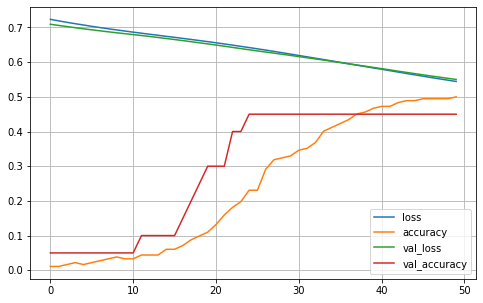

In [32]:
tf.random.set_seed(42)

model_1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

history_1 = model_1.fit(x_fake_smalltrain, x_real_smalltrain_encoded[0], epochs=50,
                    validation_data=(x_fake_val, x_real_val_encoded[0]), verbose=False)

plot_learning_acc_and_loss(history_1)

2021-12-13 15:13:09.643979: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:13:09.833035: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


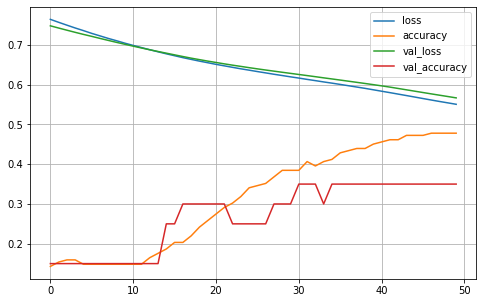

In [33]:
tf.random.set_seed(42)

model_2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_2.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

history_2 = model_2.fit(x_fake_smalltrain, x_real_smalltrain_encoded[1], epochs=50,
                    validation_data=(x_fake_val, x_real_val_encoded[1]), verbose=False)

plot_learning_acc_and_loss(history_2)

2021-12-13 15:13:16.181561: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:13:16.376556: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


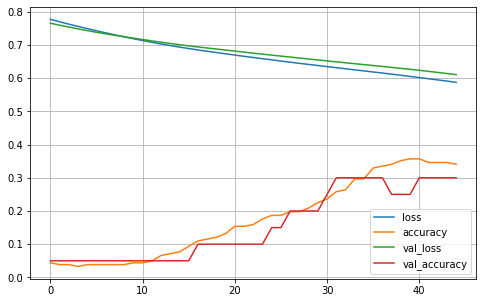

In [34]:
tf.random.set_seed(42)

model_3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_3.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

history_3 = model_3.fit(x_fake_smalltrain, x_real_smalltrain_encoded[2], epochs=45,
                    validation_data=(x_fake_val, x_real_val_encoded[2]), verbose=False)

plot_learning_acc_and_loss(history_3)

2021-12-13 15:13:22.150387: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:13:22.351796: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


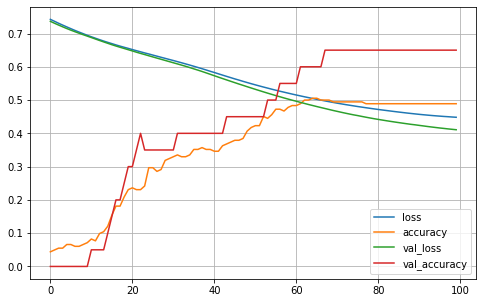

In [35]:
tf.random.set_seed(42)

model_4 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_4.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

history_4 = model_4.fit(x_fake_smalltrain, x_real_smalltrain_encoded[3], epochs=100,
                    validation_data=(x_fake_val, x_real_val_encoded[3]), verbose=False)

plot_learning_acc_and_loss(history_4)

2021-12-13 15:13:28.231552: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:13:28.440086: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


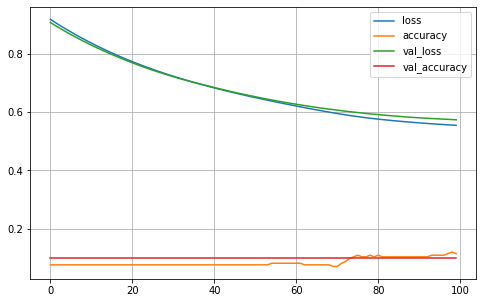

In [36]:
tf.random.set_seed(42)

model_5 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(10, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_5.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

history_5 = model_5.fit(x_fake_smalltrain, x_real_smalltrain_encoded[4], epochs=100,
                    validation_data=(x_fake_val, x_real_val_encoded[4]), verbose=False)

plot_learning_acc_and_loss(history_5)

2021-12-13 15:13:34.403604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:13:34.595672: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


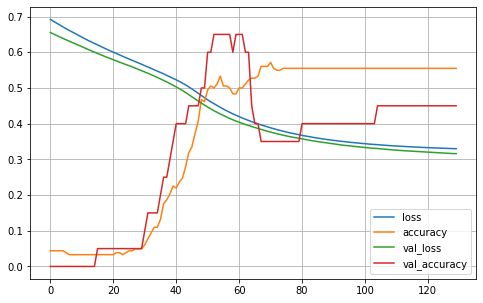

In [37]:
tf.random.set_seed(42)

model_6 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(20, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_6.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

history_6 = model_6.fit(x_fake_smalltrain, x_real_smalltrain_encoded[5], epochs=130,
                    validation_data=(x_fake_val, x_real_val_encoded[5]), verbose=False)

plot_learning_acc_and_loss(history_6)

2021-12-13 15:13:42.354992: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:13:42.568604: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


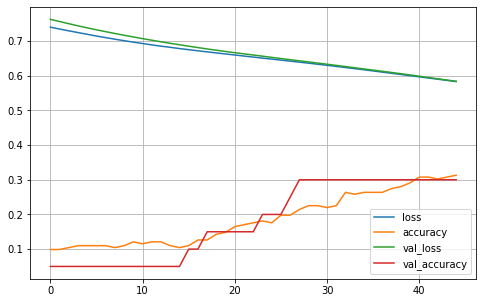

In [38]:
tf.random.set_seed(42)

model_7 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_7.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

history_7 = model_7.fit(x_fake_smalltrain, x_real_smalltrain_encoded[6], epochs=45,
                    validation_data=(x_fake_val, x_real_val_encoded[6]), verbose = False)

plot_learning_acc_and_loss(history_7)

2021-12-13 15:13:45.346700: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:13:45.547703: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


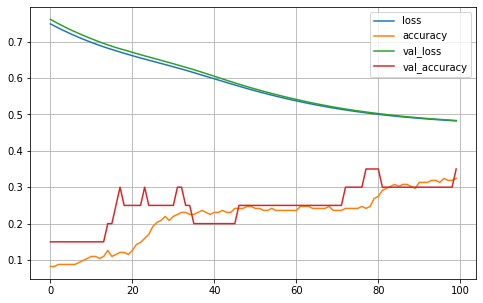

In [39]:
tf.random.set_seed(42)

model_8 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

history_8 = model_8.fit(x_fake_smalltrain, x_real_smalltrain_encoded[7], epochs=100,
                    validation_data=(x_fake_val, x_real_val_encoded[7]), verbose = False)

plot_learning_acc_and_loss(history_8)

2021-12-13 15:13:51.614938: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:13:51.811080: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


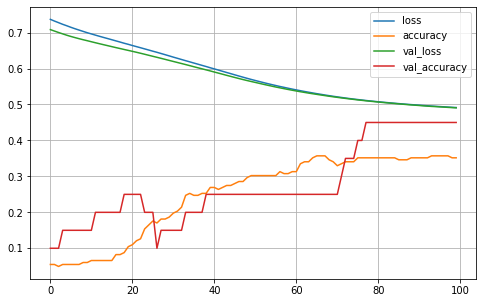

In [40]:
tf.random.set_seed(42)

model_9 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_9.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

history_9 = model_9.fit(x_fake_smalltrain, x_real_smalltrain_encoded[8], epochs=100,
                    validation_data=(x_fake_val, x_real_val_encoded[8]), verbose = False)

plot_learning_acc_and_loss(history_9)

2021-12-13 15:13:57.433939: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:13:57.614791: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.


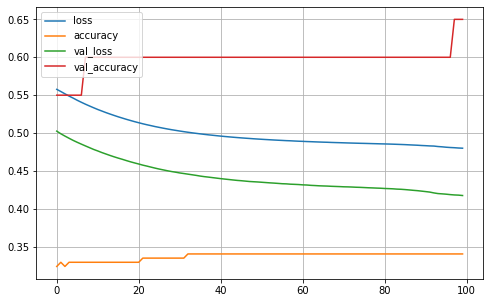

In [41]:
tf.random.set_seed(42)

model_10 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

model_10.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])

history_10 = model_1.fit(x_fake_smalltrain, x_real_smalltrain_encoded[9], epochs=100,
                    validation_data=(x_fake_val, x_real_val_encoded[9]), verbose = False)
                    
plot_learning_acc_and_loss(history_10)

In [ ]:
# calculate the MSE and MAE on Test Set
test_mse = ((predicted - x_real_test.to_numpy()) **2).mean()
test_mae = (abs(predicted - x_real_test.to_numpy())).mean()
print(f"Neural Network approach: \n MSE metric: {test_mse.round(3)} \n MAE metric: {test_mae.round(3)}")

#### Approccio 2: allenare tutti i modelli con gli stessi hyperparameters

In [42]:
model_1 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model_2 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model_3 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model_4 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model_5 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model_6 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model_7 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model_8 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model_9 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])
model_10 = tf.keras.models.Sequential([
    tf.keras.Input(shape=(10,)),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(16, activation="relu"),
    tf.keras.layers.Dense(5, activation="softmax")
])

models = [model_1, model_2, model_3, model_4, model_5, model_6, model_7, model_8, model_9, model_10]

In [43]:
tf.random.set_seed(42)

history_list = []
for (i, model) in enumerate(models):
    model.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=1e-4),
                metrics=["accuracy"])
    history = model.fit(x_fake_smalltrain, x_real_smalltrain_encoded[i], epochs=100,
                    validation_data=(x_fake_val, x_real_val_encoded[i]), verbose = False)
    history_list.append(history)

2021-12-13 15:14:51.609233: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:14:51.811792: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:14:57.733050: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:14:57.932978: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:15:03.764009: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:15:03.968145: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:112] Plugin optimizer for device_type GPU is enabled.
2021-12-13 15:15:09.625619: I tensorflow/core/grappler/optimizers/cust

#### Predictions

In [121]:
prediction_1 = model_1.predict(x_fake_test)
prediction_2 = model_2.predict(x_fake_test)
prediction_3 = model_3.predict(x_fake_test)
prediction_4 = model_4.predict(x_fake_test)
prediction_5 = model_5.predict(x_fake_test)
prediction_6 = model_6.predict(x_fake_test)
prediction_7 = model_7.predict(x_fake_test)
prediction_8 = model_8.predict(x_fake_test)
prediction_9 = model_9.predict(x_fake_test)
prediction_10 = model_10.predict(x_fake_test)

In [ ]:
predicted = np.zeros((x_fake_test.shape))
for i in range(x_fake_test.shape[0]):
    predicted[i,0] = np.average(np.arange(1, 6), weights=prediction_1[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,1] = np.average(np.arange(1, 6), weights=prediction_2[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,2] = np.average(np.arange(1, 6), weights=prediction_3[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,3] = np.average(np.arange(1, 6), weights=prediction_4[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,4] = np.average(np.arange(1, 6), weights=prediction_5[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,5] = np.average(np.arange(1, 6), weights=prediction_6[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,6] = np.average(np.arange(1, 6), weights=prediction_7[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,7] = np.average(np.arange(1, 6), weights=prediction_8[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,8] = np.average(np.arange(1, 6), weights=prediction_9[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,9] = np.average(np.arange(1, 6), weights=prediction_10[i])

In [126]:
'''
predicted = np.zeros((x_fake_test.shape))
for i in range(x_fake_test.shape[0]):
    predicted[i,0] = np.argmax(prediction_1[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,1] = np.argmax(prediction_2[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,2] = np.argmax(prediction_3[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,3] = np.argmax(prediction_4[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,4] = np.argmax(prediction_5[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,5] = np.argmax(prediction_6[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,6] = np.argmax(prediction_7[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,7] = np.argmax(prediction_8[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,8] = np.argmax(prediction_9[i])
for i in range(x_fake_test.shape[0]):
    predicted[i,9] = np.argmax(prediction_10[i])
'''

'\npredicted = np.zeros((x_fake_test.shape))\nfor i in range(x_fake_test.shape[0]):\n    predicted[i,0] = np.argmax(prediction_1[i])\nfor i in range(x_fake_test.shape[0]):\n    predicted[i,1] = np.argmax(prediction_2[i])\nfor i in range(x_fake_test.shape[0]):\n    predicted[i,2] = np.argmax(prediction_3[i])\nfor i in range(x_fake_test.shape[0]):\n    predicted[i,3] = np.argmax(prediction_4[i])\nfor i in range(x_fake_test.shape[0]):\n    predicted[i,4] = np.argmax(prediction_5[i])\nfor i in range(x_fake_test.shape[0]):\n    predicted[i,5] = np.argmax(prediction_6[i])\nfor i in range(x_fake_test.shape[0]):\n    predicted[i,6] = np.argmax(prediction_7[i])\nfor i in range(x_fake_test.shape[0]):\n    predicted[i,7] = np.argmax(prediction_8[i])\nfor i in range(x_fake_test.shape[0]):\n    predicted[i,8] = np.argmax(prediction_9[i])\nfor i in range(x_fake_test.shape[0]):\n    predicted[i,9] = np.argmax(prediction_10[i])\n'

In [ ]:
# calculate the MSE and MAE on Test Set
test_mse = ((predicted - x_real_test.to_numpy()) **2).mean()
test_mae = (abs(predicted - x_real_test.to_numpy())).mean()
print(f"Neural Network approach: \n MSE metric: {test_mse.round(3)} \n MAE metric: {test_mae.round(3)}")

Neural Network approach: 
 MSE metric: 1.111 
 MAE metric: 0.867
